In [18]:
import pandas as pd
import plotly.express as px
from dash import html
from dash import dcc

In [47]:
df = pd.read_csv("spacex_launch_dash.csv")
spacex_df = df

In [48]:
print(df.shape)
df.head()

(56, 8)


,Unnamed: 0,Flight Number,Launch Site,Mission Outcome,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,Success,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,Success,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,Success,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,Success,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,Success,0,677.0,F9 v1.0 B0007,v1.0


In [168]:
for index, row in df['Launch Site'].value_counts().to_frame().iterrows():
    print(row.name)

CCAFS LC-40
KSC LC-39A
VAFB SLC-4E
CCAFS SLC-40


In [160]:
df[['Launch Site']].iterrows()

<generator object DataFrame.iterrows at 0x000001DBE9F5A9E0>

In [159]:
df['Launch Site'].value_counts().to_frame().iterrows()

<generator object DataFrame.iterrows at 0x000001DBE9FE76D0>

In [152]:
df['Launch Site'].value_counts().index.to_list()

['CCAFS LC-40', 'KSC LC-39A', 'VAFB SLC-4E', 'CCAFS SLC-40']

In [171]:
grouped_df = spacex_df[['Launch Site', 'class']].groupby(by=['Launch Site'], as_index=False).mean()
grouped_df

,Launch Site,class
0,CCAFS LC-40,0.269231
1,CCAFS SLC-40,0.428571
2,KSC LC-39A,0.769231
3,VAFB SLC-4E,0.400000


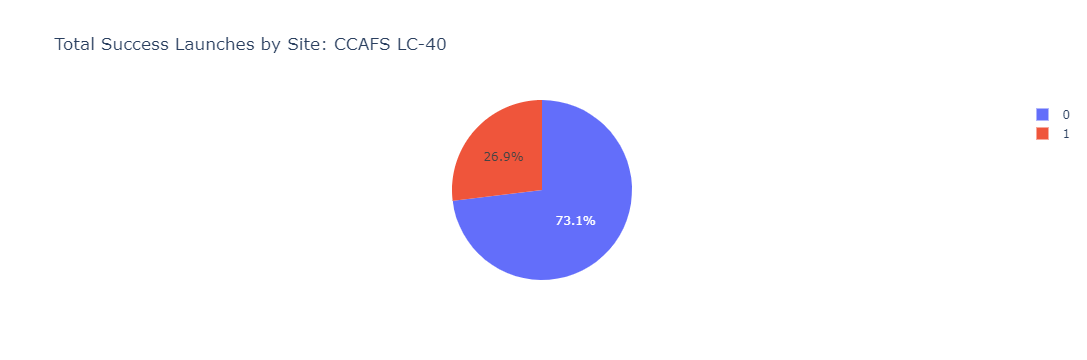

In [151]:
entered_site = df['Launch Site'].value_counts().index.to_list()[0]
# filtered_df = spacex_df[['Launch Site', 'class']].groupby(by=['Launch Site'], as_index=False).mean()
filtered_df = spacex_df[['Launch Site', 'class']][spacex_df['Launch Site'] == entered_site]
mean = filtered_df.groupby(by='Launch Site', as_index=False).mean()
means = {}
means[1] = mean['class'][0]
means[0] = 1 - means[1]

fig = px.pie(values=means.values(), names=means.keys(),
             title=f'Total Success Launches by Site: {entered_site}')

fig.show()

# means_df = pd.DataFrame([means]).transpose()
# means_df.rename(columns={0: 'class'}, inplace=True)
# means_df

In [143]:
means.values()

dict_values([0.2692307692307692, 0.7307692307692308])

### dcc.RangeSlider

In [180]:
# dcc.RangeSlider(id='payload-slider',...)
# id to be payload-slider
# min indicating the slider starting point, we set its value to be 0 (Kg)
# max indicating the slider ending point to, we set its value to be 10000 (Kg)
# step indicating the slider interval on the slider, we set its value to be 1000 (Kg)
# value indicating the current selected range, we could set it to be min_payload and max_payload
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()
dcc.RangeSlider(id='payload-slider', min=min_payload, max=max_payload, step=1000, value=[min_payload, max_payload])

RangeSlider(id='payload-slider', max=9600.0, min=0.0, step=1000, value=[0.0, 9600.0])

``` python
dcc.RangeSlider(id=undefined, marks=undefined, value=undefined, drag_value=undefined, 
                allowCross=undefined, className=undefined, count=undefined, 
                disabled=undefined, dots=undefined, included=undefined, 
                min=undefined, max=undefined, pushable=undefined, tooltip=undefined, 
                step=undefined, vertical=undefined, verticalHeight=undefined, 
                updatemode=undefined, loading_state=undefined, persistence=undefined, 
                persisted_props=undefined, persistence_type=undefined, **kwargs)
```

In [183]:
spacex_df['Booster Version Category'].value_counts()

FT      24
v1.1    15
B4      11
v1.0     5
B5       1
Name: Booster Version Category, dtype: int64

In [204]:
min_slider = 3000  # min_payload
max_slider = 6000  # max_payload
payload_filtered_df = spacex_df[['Payload Mass (kg)', 'Booster Version Category', 'class']][(spacex_df['Payload Mass (kg)'] <= max_slider) & (spacex_df['Payload Mass (kg)'] >= min_slider)]

print(f'min: {min_payload}, max: {max_payload}')
print('shape:', payload_filtered_df.shape)
payload_filtered_df

min: 0.0, max: 9600.0
shape: (24, 3)


,Payload Mass (kg),Booster Version Category,class
5,3170.00,v1.1,0
6,3325.00,v1.1,0
9,4535.00,v1.1,0
10,4428.00,v1.1,0
14,4159.00,v1.1,0
16,4707.00,v1.1,0
19,5271.00,FT,0
20,3136.00,FT,1
21,4696.00,FT,1
22,3100.00,FT,1


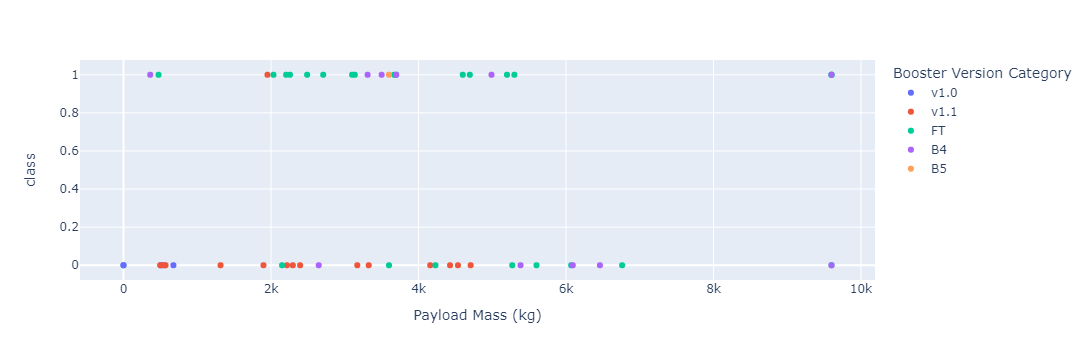

In [184]:
fig = px.scatter(data_frame=spacex_df, x='Payload Mass (kg)', y='class', color='Booster Version Category')
fig.show()

In [181]:
help(px.scatter)

Help on function scatter in module plotly.express._chart_types:

scatter(data_frame=None, x=None, y=None, color=None, symbol=None, size=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, orientation=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, symbol_sequence=None, symbol_map=None, opacity=None, size_max=None, marginal_x=None, marginal_y=None, trendline=None, trendline_options=None, trendline_color_override=None, trendline_scope='trace', log_x=False, log_y=False, range_x=None, range_y=None, render_mode='auto', title=None, template=None, width=None, height=None)
        In a scatter plot, each row of `data_frame` is represented by a sy